In [67]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")

In [68]:
# Reading CSVs

df1=pd.read_csv("1980.csv")
df2=pd.read_csv("1985.csv")

In [69]:
# Function to get Cumulative Values


def getCumulatedValues(df, column):
    cumulatedArray = (df[column].cumsum()/df[column].sum())*100
    return cumulatedArray

In [70]:
# Function to get required data in arrays

def getDataForLorenz(df):
    
    # Making empty Array for Real GDP per Capita
    GDPperCapita = np.array([])
    
    # Adding Real GDP per Capita Column to Dataframe
    for i in range(df['Year'].count()):
        GDPperCapita = np.append(GDPperCapita, df['Real GDP(in milllion $)'][i]/df['Population (in millions)'][i])
        
    df['Real GDP per capita'] = GDPperCapita
    
    # Sorting Dataframe according to Real GDP per Capita
    sortedDf = df.sort_values(["Real GDP per capita"], ignore_index=True)
    
    # Getting Required Cumulated Values
    CumulatedPercentPopulation = getCumulatedValues(sortedDf, 'Population (in millions)')
    CumulatedPercentGDP = getCumulatedValues(sortedDf, 'Real GDP(in milllion $)')
    
    return CumulatedPercentPopulation, CumulatedPercentGDP

In [71]:
# Function to Plot Lorenz of Single Year

def plotLorenz(arr, year):    
    plt.plot(arr[0], arr[1]) # Plotting the two arrays
    plt.plot([0,100], [0,100], color = 'black', linewidth = 1) # Plotting the Equality Line
    plt.title('Lorenz Curve for the Year ' + str(year))
    plt.ylabel('Cumulative GDP per Capita') 
    plt.xlabel('Cumulative % of Countries')

In [72]:
# Function to Plot Lorenz of Both Years

def plotBothLorenz(arr1, label1, arr2, label2):
    plt.plot(arr1[0], arr1[1], label = str(label1)) # Plotting Lorenz of First Year
    plt.plot(arr2[0], arr2[1], label = str(label2)) # Plotting Lorenz of Second Year
    plt.plot([0,100], [0,100], color = 'black', linewidth = 1) # Plotting the Equality line
    plt.ylabel('Cumulative GDP per Capita')
    plt.xlabel('Cumulative % of Countries') 
    plt.legend()

In [73]:
# Function to Calculate Gini Coefficient

def calculateGini(arr):
    
    # Calucluating Area under the Lorenz Curve
    area = 0
    for i in range(len(arr[0]) - 1):
        temp = (arr[0][i+1] - arr[0][i])*(arr[1][i+1] + arr[1][i])/2
        area += temp
    
    # Calculating the Ratio
    AREA_UNDER_EQUALITY_LINE = (100*100)/2
    gini = (AREA_UNDER_EQUALITY_LINE - area)/AREA_UNDER_EQUALITY_LINE
    return gini

In [74]:
lorenz_1980 = getDataForLorenz(df1)
lorenz_1985 = getDataForLorenz(df2)

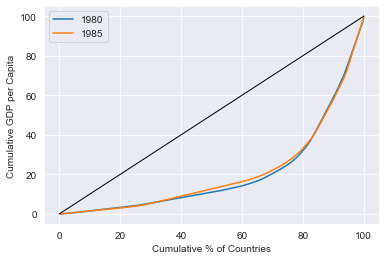

In [75]:
plotBothLorenz(lorenz_1980, 1980, lorenz_1985, 1985)

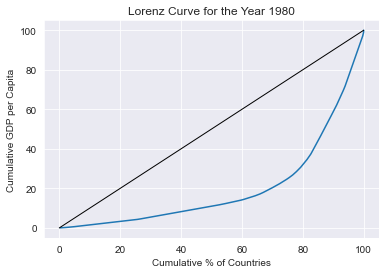

In [76]:
plotLorenz(lorenz_1980, 1980)

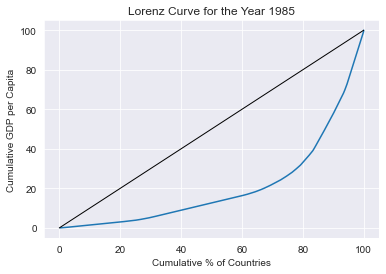

In [77]:
plotLorenz(lorenz_1985, 1985)

In [78]:
print('Gini Coefficient of the Year 1980 is', calculateGini(lorenz_1980))
print('Gini Coefficient of the Year 1985 is', calculateGini(lorenz_1985))

Gini Coefficient of the Year 1980 is 0.5998415119221914
Gini Coefficient of the Year 1985 is 0.588813224331954
